In [49]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def f(x):
    return x**2 + 4*x + 7

In [51]:
f(3)

28

-3.75
6.0625


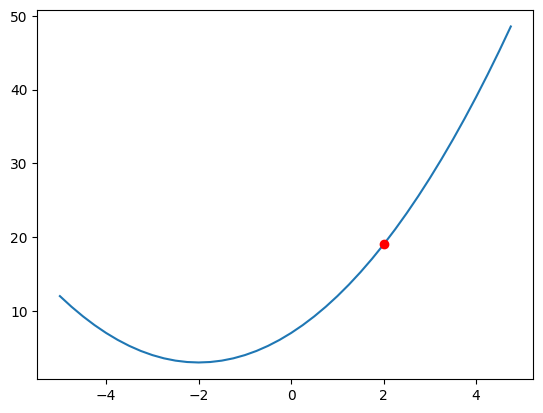

In [52]:
xs = np.arange(-5, 5, .25)
ys = f(xs)
print(xs[5])
print(ys[5])
plt.plot(xs, ys)
a = f(2)
plt.plot(2, a, 'ro')

In [53]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir': 'LR'}) #LR c-a-d left to right
    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            
        # for any value in the graph, create a rectanular node for it
        
            dot.node(name = uid + n._op, label = n._op)

            # connect node to it

            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

        
    

In [54]:
class Value:
    def __init__(self, data, _children=(), _op='', label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value data={self.data}"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'


In [55]:
d._prev

{Value data=-6.0, Value data=10.0}

In [56]:
d._op

'+'

In [62]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * -3.0
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
c.grad = d.grad
e.grad =  d.grad

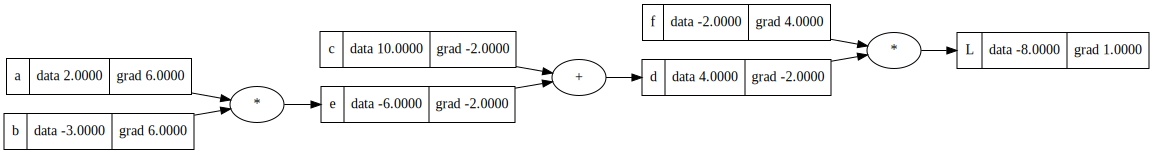

In [63]:
draw_dot(L)

-0.9999999999999964